In [14]:
import csv
import numpy as np
import matplotlib.pylab as plt


In [15]:
def data_to_matrix(file, pm):
    if pm==1:
        d=[]
        with open(file,'rt')as f:
            data = csv.reader(f)
            for row in data:
                d.append(row)
        d=d[1:]
        p=[]
        dat1=[]
        for i in range(len(d)):
            p.append(int(d[i][1]))
            dat1.append(d[i][0])
        data_act= np.zeros((62,24))
        for i in range(len(d)):
            p1=int(dat1[i][5:7])
            p2=int(dat1[i][8:10])
            t=int(dat1[i][11:13])
            row=p2+(p1-4)*30
            col=t
            if row>=0 and row<=61:
                data_act[row,col]=p[i]

    else:
        d=[]
        with open(file,'rt')as f:
            data = csv.reader(f)
            for row in data:
                d.append(row)
        d=d[1:]
        p=[]
        pp=[]
        dat1=[]
        for i in range(len(d)):
            p.append(float(d[i][2]))
            pp.append(float(d[i][3]))
            dat1.append(d[i][0])

        data_act= np.zeros((62,24,2))
        for i in range(len(d)):
            p1=int(dat1[i][5:7])
            p2=int(dat1[i][8:10])
            t=int(dat1[i][11:13])
            row=p2+(p1-4)*30
            col=t
            if row>=0 and row<=61:
                data_act[row,col,0]=p[i]

                data_act[row,col,1]=pp[i]
    return(data_act)

In [26]:
data_1=data_to_matrix('data/Rpr_2.csv',1)
data_2=data_to_matrix('data/Rpr_3.csv',1)
data_3=data_to_matrix('data/Rpr_4.csv',1)
data_4=data_to_matrix('data/Rpr_5.csv',1)

In [27]:
data_1=np.reshape(data_1,1488)
data_2=np.reshape(data_2,1488)
data_3=np.reshape(data_3,1488)
data_4=np.reshape(data_4,1488)

In [28]:
temp_1=data_to_matrix('data/Rpr_2.csv',2)

In [60]:
X=np.zeros((1488,4))
X[:,0]=np.reshape(temp_1[:,:,0],1488)
X[:,1]=np.reshape(temp_1[:,:,1],1488)
X[:,2]=data_2
X[:,3]=data_3


X1=X[:,0:2]
Y=data_1

# Predicting the air quality using temp and humidity 

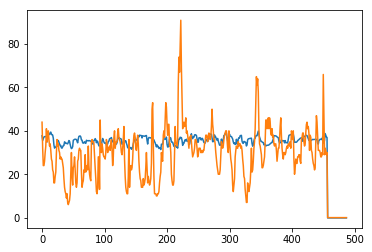

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X1[:1000],Y[:1000])

out_nn=model.predict(X1[1000:])
plt.plot(out_nn)
plt.plot(Y[1000:])

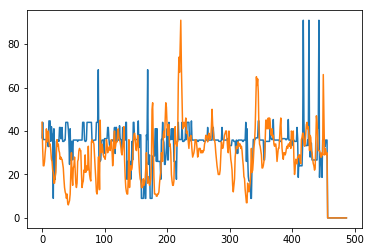

In [55]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=8)
model.fit(X1[:1000],Y[:1000])

out_nn=model.predict(X1[1000:])
plt.plot(out_nn)
plt.plot(Y[1000:])

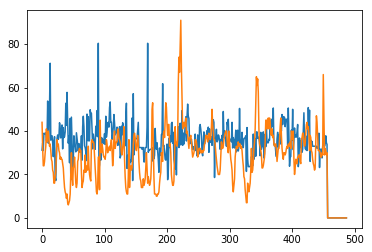

In [56]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X1[:1000],Y[:1000])

out_nn=model.predict(X1[1000:])
plt.plot(out_nn)
plt.plot(Y[1000:])

# Air quality prediction using temp humidity and other spatial location

# 1.  coeff for temp, humidity, data_2, data_3

[ 0.45121159 -0.01842414  0.28098586  0.34033572]


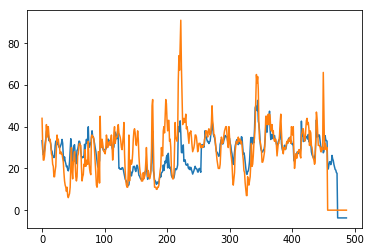

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

neigh = LinearRegression()
neigh.fit(X[:1000],Y[:1000])

out_nn=neigh.predict(X[1000:])
plt.plot(out_nn)
plt.plot(Y[1000:])

print(neigh.coef_)

# coeff for temp, humidity, data_2, data_4 (different location)

56.562018634572595
[ 0.43907903 -0.00953294  0.27212435  0.45738215]


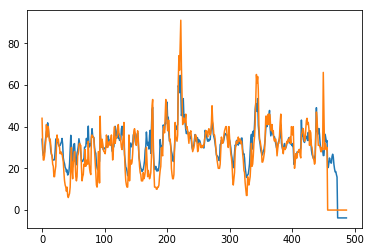

In [62]:
X[:,3]=data_4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

neigh = LinearRegression()
neigh.fit(X[:1000],Y[:1000])

out_nn=neigh.predict(X[1000:])
plt.plot(out_nn)
plt.plot(Y[1000:])
#print(neigh.score(data_temp[1000:,:], data_ppm[1000:]))
print(mean_squared_error(out_nn, Y[1000:]))
print(neigh.coef_)